## Predicting Bulldozer Sales Price

### Problem Definition : Predict Future Sale Price of the Bulldozer, on the basis of Past Data.

### Data : [Kaggle Bluebook for Bulldozers Competition](https://www.kaggle.com/c/bluebook-for-bulldozers/data) Data Sets consist of Train, Valid and Test Sets.

### Evaluation : The RMSLE (Root Mean Squared Log Error) between the Actual and Predicted Prices.

### Features : [Data Dictionary](https://onedrive.live.com/edit.aspx?action=edit&resid=26F317A832E8F14!125&ithint=file%2cxlsx&wdNewAndOpenCt=1591785031336&wdPreviousSession=36d91913-5fc0-4248-be43-4fe475cc970f&wdOrigin=OFFICECOM-WEB.START.UPLOAD)

****

**Import Required Data Set**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Import Train and Validate Data Set**

In [2]:
Data = pd.read_csv('TrainAndValid.csv', low_memory = False)

**Pandas try to Minimize the Space utilized by the Data if the Size of Data is Large, Low Memory is set to False so that Data get enough RAM.**

### Explore Data Set

In [3]:
print(Data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

**Check for Null Values**

In [4]:
print(Data.isnull().sum())

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

### Visualize Data

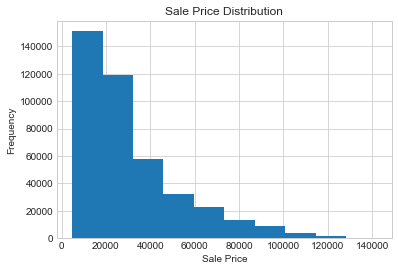

In [5]:
plt.style.use('seaborn-whitegrid')
Data['SalePrice'].plot.hist()
plt.title('Sale Price Distribution')
plt.xlabel('Sale Price');

**Dealing with Time Series / Date and Time / Timestamp Data : Parsing Dates**

In [6]:
Data = pd.read_csv('TrainAndValid.csv', low_memory = False, parse_dates = ['saledate'])

**Parse Date converts object Date Type to datetime Data Type**

In [7]:
print(Data['saledate'].head())

0   2006-11-16
1   2004-03-26
2   2004-02-26
3   2011-05-19
4   2009-07-23
Name: saledate, dtype: datetime64[ns]


**Scatter Plot**

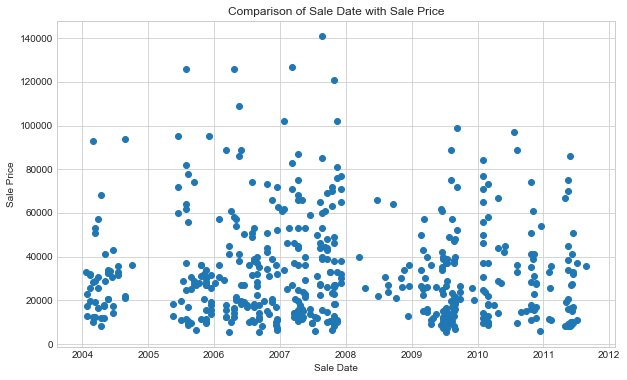

In [8]:
Fig, Axes = plt.subplots(figsize = (10, 6))
Axes.scatter(Data['saledate'][:500], Data['SalePrice'][:500])
plt.title('Comparison of Sale Date with Sale Price')
plt.xlabel('Sale Date')
plt.ylabel('Sale Price');

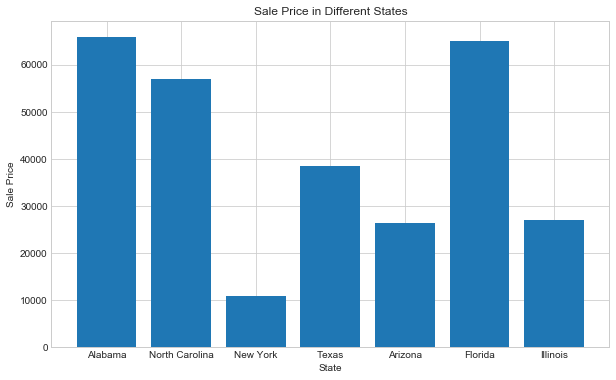

In [9]:
plt.figure(figsize = (10,6))
plt.bar(Data['state'][:10],Data['SalePrice'][:10])
plt.title('Sale Price in Different States')
plt.xlabel('State')
plt.ylabel('Sale Price');

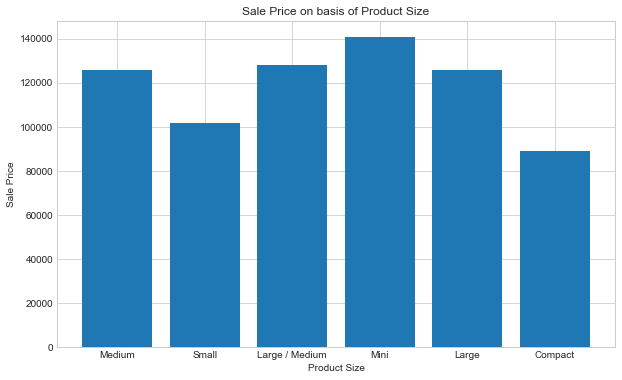

In [10]:
plt.figure(figsize = (10,6))
plt.bar(Data['ProductSize'].dropna()[:1000],Data['SalePrice'][:1000])
plt.title('Sale Price on basis of Product Size')
plt.xlabel('Product Size')
plt.ylabel('Sale Price');

In [11]:
Data.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**For Better Observation : Transpose the Data Frame**

**Transposing Data Frame converts Index into Columns and Columns into Index.**

In [12]:
Data.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000,57000,10000,38500,11000
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68,4640,2838,3486,722
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


**The Dates are not in Sorted Manner they are Randomly placed in Data Set, while working with Time Series Data, it's Good to Sort by Date.**

### Sort Data Frame by Sale Date

In [13]:
Data.sort_values(by = ['saledate'], inplace = True, ascending = True)

In [14]:
Data.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN


### Feature Engineering

**Enrich Data : Add datetime Parameters for saledate Feature using Pandas datetime attribute (dt)**

In [15]:
print(Data['saledate'][:1])
print()
print(Data['saledate'][:1].dt.year) # Extract Year 
print()
print(Data['saledate'][:1].dt.month) # Extract Month
print()
print(Data['saledate'][:1].dt.day) # Extract Date (Day of Month)

205615   1989-01-17
Name: saledate, dtype: datetime64[ns]

205615    1989
Name: saledate, dtype: int64

205615    1
Name: saledate, dtype: int64

205615    17
Name: saledate, dtype: int64


**Add New Features of Sale Year, Month, Day of Week and Day of Year**

In [16]:
Data['saleYear'] = Data['saledate'].dt.year 

Data['saleMonth'] = Data['saledate'].dt.month 
    
Data['saleofDay'] = Data['saledate'].dt.day 

Data['saleDayOfWeek'] = Data['saledate'].dt.dayofweek 

Data['saleDayOfYear'] = Data['saledate'].dt.dayofyear 

**New Features are enriched, Drop saledate Feature.**

In [17]:
Data.drop('saledate', axis = 'columns', inplace = True)

In [18]:
Data.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleofDay,saleDayOfWeek,saleDayOfYear
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,TD20,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,A66,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,D7G,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,1,31
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,A62,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,D3B,...,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,31,1,31


**Which State has the Most Sales ?**

In [19]:
print(Data['state'].value_counts())

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virginia   

**Check whether Column is of Data Type String ?**

In [20]:
print(pd.api.types.is_string_dtype(Data['UsageBand']))

True


**Find the Columns which contains Strings Data Type.**

In [21]:
# Treat Data as Dictionary (key and value) pair.
for label, val in Data.items() : 
    
    # The Data Values of Column of String Data Type.
    if pd.api.types.is_string_dtype(val) : 
        
        # Column Name which contains Data Value of String Data Type. 
        print(label) 

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


**[Convert String to Pandas Categories](https://pandas.pydata.org/pandas-docs/stable/reference/general_utility_functions.html)**

**Convert Strings to Categorical Values, Each Categorical Value is assigned with a Numerical Value.**

In [22]:
for label, val in Data.items() :
    
    # Check whether the Data Values are Numerical Data Type.
    if pd.api.types.is_string_dtype(val) :
        
        # Assign the Value of Column with Numeric Code to each Category.
        Data[label] = val.astype('category').cat.as_ordered() 

In [23]:
print(Data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

**Arrange the Data in Alphabetical Order : cat.as_ordered()**

In [24]:
print(Data['state'].cat.categories) 

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')


**Each Data Value is Assigned with a Numeric Code.**

In [25]:
print(f'State Names : \n{Data.state.head()}')
print()
print(f'Sate Codes :')
print(Data['state'].cat.codes.head())

State Names : 
205615      Texas
274835    Florida
141296    Florida
212552    Florida
62755     Florida
Name: state, dtype: category
Categories (53, object): [Alabama < Alaska < Arizona < Arkansas ... Washington DC < West Virginia < Wisconsin < Wyoming]

Sate Codes :
205615    43
274835     8
141296     8
212552     8
62755      8
dtype: int8


**Check Missing Data**

In [26]:
print(Data.isnull().sum())

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

**Save Preprocessed Data**

In [27]:
Data.to_csv('Bulldozer.csv', index = False)

**Import Preprocessed Data**

In [28]:
Data = pd.read_csv('Bulldozer.csv', low_memory = False)

In [29]:
Data.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18,99,99,99,99
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


**Data cannot be used for Data Modelling, if it contains Missing Values and Especially if it consists of Non Numeric Columns.**

**Lots of Missing Values to Deal with.**

In [30]:
print(Data.isnull().sum())

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

### Fill Missing Values :

**Fill Numerical Missing Values**

1. **First Find All Numeric Columns.**

In [31]:
for label, val in Data.items() :
    
    # Check whether Data Values are Numeric
    if pd.api.types.is_numeric_dtype(val) :
        
        # Columns with Numerical Values.
        print(label) 

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleofDay
saleDayOfWeek
saleDayOfYear


2. **Find all Numeric Columns with Missing Values.**

In [32]:
for label, val in Data.items() :
    
    if pd.api.types.is_numeric_dtype(val) :
        
        if pd.isnull(val).sum() : # Check for Missing Values in Numeric Columns.
            
            print(label) # Name of the Numeric Columns with Null Values.

auctioneerID
MachineHoursCurrentMeter


3. **Fill Numeric Rows with Median.**

In [33]:
for label, val in Data.items() :
    
    # Check Data Type of Column whether is Numeric. 
    if pd.api.types.is_numeric_dtype(val) :
        
        if pd.isnull(val).sum() : # If Value is Missing
            
            # Add Column to Indicate that Value is Missing with True Value.
            Data[label+'_is_missing'] = pd.isnull(val)
            
            # Fill Numeric Missing Values with Median
            Data[label] = val.fillna(val.median()) # Median is more Robust over Mean.

4. **Check whether any Numrical column is Missing any more**

In [34]:
for label, val in Data.items() :
    
    if pd.api.types.is_numeric_dtype(val) :
        
        if pd.isnull(val).sum() :
            
            print(label)

**Every Numerical Missing Value is Filled with the Median, No Missing Value is Left in Numerical Columns.**

5. **Check how many Missing Values where Filled**

In [35]:
print(Data.auctioneerID_is_missing.value_counts())
print()
print(Data.MachineHoursCurrentMeter_is_missing.value_counts())

False    392562
True      20136
Name: auctioneerID_is_missing, dtype: int64

True     265194
False    147504
Name: MachineHoursCurrentMeter_is_missing, dtype: int64


****
**Check for Non Numeric Columns.**

In [36]:
for label, val in Data.items() :
    
    # Check for Columns not Numeric.
    if not pd.api.types.is_numeric_dtype(val) : 
        
        # Name of all Columns.
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


**Every Data Value is Assigned with a Numeric Codes.**

In [37]:
print(pd.Categorical(Data['state']))
print()
print('Codes for Each Categorical Values : ',pd.Categorical(Data['state']).codes)

[Texas, Florida, Florida, Florida, Florida, ..., California, California, California, California, California]
Length: 412698
Categories (53, object): [Alabama, Alaska, Arizona, Arkansas, ..., Washington DC, West Virginia, Wisconsin, Wyoming]

Codes for Each Categorical Values :  [43  8  8 ...  4  4  4]


In [38]:
for label, val in Data.items() :
    
    if not pd.api.types.is_numeric_dtype(val) :
        
        # Add Binary Indicator to Find the Total Missing Samples Filled
        Data[label+'_is_missing'] = pd.isnull(val)
        
        # Convert Categories into Numbers and Add 1
        Data[label] = pd.Categorical(val).codes + 1

# By Default the Code of Missing Value or Null Value is -1 so it forms a Single Category of Numeric Code == 0

**Adding 1 makes the Category Code of Missing Values to Zero.**

In [39]:
pd.Categorical(Data['UsageBand']).codes

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [40]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 77.9 MB


In [41]:
print(Data.head().T) # True and False is considered as 1 and 0

                                    0        1        2        3        4
SalesID                       1646770  1821514  1505138  1671174  1329056
SalePrice                        9500    14000    50000    16000    22000
MachineID                     1126363  1194089  1473654  1327630  1336053
ModelID                          8434    10150     4139     8591     4089
datasource                        132      132      132      132      132
...                               ...      ...      ...      ...      ...
Backhoe_Mounting_is_missing     False     True    False     True    False
Blade_Type_is_missing           False     True    False     True    False
Travel_Controls_is_missing      False     True    False     True    False
Differential_Type_is_missing     True    False     True    False     True
Steering_Controls_is_missing     True    False     True    False     True

[103 rows x 5 columns]


**Check Again for Missing Values.**

In [42]:
print(Data.isnull().sum())

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64


**Now the Data has No Missing Values and all the Columns are Converted into Numeric, Ready for Modelling.**
****
### Data Modelling

In [43]:
Data.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,4593,...,True,True,True,True,True,False,False,False,True,True
1,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,0,1820,...,True,True,True,True,True,True,True,True,False,False
2,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,0,2348,...,True,True,True,True,True,False,False,False,True,True
3,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,0,1819,...,True,True,True,True,True,True,True,True,False,False
4,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,0,2119,...,True,True,True,True,True,False,False,False,True,True


In [44]:
Bulldozer =  Data.iloc[:,:57]

**Import Library for Machine Learning Model**

In [45]:
from sklearn.ensemble import RandomForestRegressor

**The Size of Data is Large, It will take more Time to Find all the Patterns in Data.**

**Aim of our Experimentation should be to Reduce the Amount of Time it takes between Experiments**

**Generalization : The Ability of Machine Learning Model to Perform Well on Data it hasn't seen before.**

In [46]:
print(f'length of Data : {len(Data)}')

length of Data : 412698


### Splitting Data

**According to Kaggle :**

**1. Train Set : Data Uptil the End of 2011**

**2. Valid Set : Data from 1st January 2012 to 30th April 2012**

**3. Test Set : Data from 1st May 2012 to November 2012**

In [47]:
print(Data['saleYear'].value_counts())

2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: saleYear, dtype: int64


### Split Data into Train and Valid Set.

**Every Year except 2012 will be the Training Set**

In [48]:
Data_Train = Data[Data['saleYear'] != 2012]

Data_Valid = Data[Data['saleYear'] == 2012]

print(f'Train Set Size: {len(Data_Train)} \nValid Set Size : {len(Data_Valid)}')

Train Set Size: 401125 
Valid Set Size : 11573


**Splitting the Data into Independent Features ( X ) and Dependent Feature ( Y )**

In [49]:
X_Train = Data_Train.drop('SalePrice', axis = 'columns')

Y_Train = Data_Train['SalePrice']

X_Valid = Data_Valid.drop('SalePrice', axis = 'columns')

Y_Valid = Data_Valid['SalePrice']

print(f'Train Set has : {X_Train.shape[0]} Rows and {X_Train.shape[1]} Columns')
print()
print(f'Valid Set has : {X_Valid.shape[0]} Rows and {X_Valid.shape[1]} Columns')

Train Set has : 401125 Rows and 102 Columns

Valid Set has : 11573 Rows and 102 Columns


**Create Evaluation Function ( Kaggle Competition uses RMSLE : Root Mean Squared Log Error )**

In [50]:
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error, mean_squared_log_error

def RMSLE(Y_Test, Y_Prediction) :
    
    '''
    
    Calculate Root Mean Squared Log Error between the Prediction and Actual Labels.
    
    Parameters
    ----------
    
    Y_Test : Test Set of Data.
    
    Y_Prediction : Prediction made by Model.
    
    '''
    
    return np.sqrt(mean_squared_log_error(Y_Test, Y_Prediction))

**Create Function to Predict and Evaluate the Model on Train Set and Valid Set.**

In [51]:
def Scores(Model) : 
    Train_Prediction = Model.predict(X_Train)
    Valid_Prediction = Model.predict(X_Valid)
    
    Scores = {'Train Set R^2' : r2_score(Y_Train, Train_Prediction),
        
              'Train Set MAE' : mean_absolute_error(Y_Train, Train_Prediction),
              
              'Train Set RMSLE' : RMSLE(Y_Train, Train_Prediction),
              
              'Valid Set R^2' : r2_score(Y_Valid, Valid_Prediction),
              
              'Valid Set MAE' : mean_absolute_error(Y_Valid, Valid_Prediction),
              
              'Valid Set RMSLE' : RMSLE(Y_Valid, Valid_Prediction)}
                                
    return Scores

**Fit the Model on Train Set and Check the Total Wall Time.**

In [52]:
%%time

Model = RandomForestRegressor(n_estimators = 100, n_jobs = -1, random_state = 42)

Model.fit(X_Train, Y_Train)

Wall time: 12min 32s


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

**You can Clearly Observe the Difference between the Wall Time of Modles based on Samples it takes for Training.**

**Check Scores :**

In [53]:
Scores(Model)

{'Train Set R^2': 0.9875150955953674,
 'Train Set MAE': 1578.2015208725463,
 'Train Set RMSLE': 0.08426351714047395,
 'Valid Set R^2': 0.8727175969771312,
 'Valid Set MAE': 6120.959637950402,
 'Valid Set RMSLE': 0.25557446689440955}

## Hyperparameter Tunning :

**Hyperparameter Tunning with Randomized Search Cross Validation :**

In [54]:
from sklearn.model_selection import RandomizedSearchCV

**Set Parameter Grid**

In [55]:
Parameters = {'n_estimators' : np.arange(10, 100, 10),
              'max_depth' : [None, 3, 5, 10],
              'min_samples_split' : np.arange(2, 20, 2),
              'min_samples_leaf' : np.arange(1, 20, 2),
              'max_features' : [0.5, 'sqrt', 'auto']} 

**Instantiate Model Instance**

In [56]:
Model = RandomizedSearchCV(RandomForestRegressor(n_estimators = 100, n_jobs = -1, random_state = 42),
                           param_distributions = Parameters,n_iter = 2, cv = 5, verbose = True)

In [57]:
%%time

Model.fit(X_Train, Y_Train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 11.6min finished


Wall time: 12min 57s


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100, n_jobs=-1,
                                                   oob_score=False,
                                                   random_state=42...


**Best Parameters**

In [58]:
print(Model.best_params_)

{'n_estimators': 40, 'min_samples_split': 16, 'min_samples_leaf': 1, 'max_features': 0.5, 'max_depth': 10}


**Evaluate the Randomized Search Cross Validation Model**

In [59]:
Scores(Model)

{'Train Set R^2': 0.8145131869225682,
 'Train Set MAE': 6613.109230666771,
 'Train Set RMSLE': 0.294535147757142,
 'Valid Set R^2': 0.8163718074293995,
 'Valid Set MAE': 7586.518232900381,
 'Valid Set RMSLE': 0.30496889567981267}

**Train the Model with Best Hyper Parameters**

**Most Ideal Parameters in this Case**

In [60]:
Ideal_Model = RandomForestRegressor(n_estimators = 40, n_jobs = -1,   
                                    min_samples_split = 14, 
                                    min_samples_leaf = 1, 
                                    max_features = 0.5, 
                                    random_state = 42)

**Fit the Ideal Model**

In [61]:
%%time
Ideal_Model.fit(X_Train, Y_Train)

Wall time: 1min 53s


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=0.5, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=14,
                      min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=-1,
                      oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

**Evaluate the Ideal Model**

In [62]:
Scores(Ideal_Model)

{'Train Set R^2': 0.9588145522577225,
 'Train Set MAE': 2953.8161137163484,
 'Train Set RMSLE': 0.14469006962371858,
 'Valid Set R^2': 0.8818019502450094,
 'Valid Set MAE': 5951.247761444453,
 'Valid Set RMSLE': 0.24524163989538328}

**Improvement in Root Mean Squared Log Error is Clearly Visible in the Ideal Model**
****
### Make Predictions on Test Data Set

**Import Test Data Set**

In [63]:
Test_Data = pd.read_csv('Test.csv', low_memory = False, parse_dates = ['saledate'])

Test_Data.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


### Preprocessing the Data

**Getting the Test Data Set in the same format as Train Data Set.**

In [64]:
def Preprocess_Data(Data) : 
    '''
    
    Transforms Data
    
    Parameter 
    ---------
    Data : Data Frame
    
    '''
    
    # Enrich New Features prom existing Feature.
    Data['saleYear'] = Data['saledate'].dt.year
    
    Data['saleMonth'] = Data['saledate'].dt.month
    
    Data['saleofDay'] = Data['saledate'].dt.day
    
    Data['saleDayOfWeek'] = Data['saledate'].dt.dayofweek
    
    Data['saleDayOfYear'] = Data['saledate'].dt.dayofyear
    
    # Drop the Column after Enriching New Features
    Data.drop('saledate', axis = 'columns', inplace = True)
    
    # Fill the Missing Numeric Values with Median
    
    for label, val in Data.items() :
        
        if pd.api.types.is_numeric_dtype(val) :
            
            if pd.isnull(val).sum() : 
                
                Data[label + '_is_missing'] = pd.isnull(val)
                
                Data[label] = val.fillna(val.median())
            
        
        # Fill Categorical Missing Data and Convert Categorical to Numeric
        
        if not pd.api.types.is_numeric_dtype(val) :
            
            Data[label + '_is_missing'] = pd.isnull(val)
            
            Data[label] = pd.Categorical(val).codes + 1
    
    return Data

In [65]:
Test_Data = Preprocess_Data(Test_Data)

Test_Data.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [66]:
X_Train.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,1126363,8434,132,18.0,1974,0.0,0,4593,1744,...,True,True,True,True,True,False,False,False,True,True
1,1821514,1194089,10150,132,99.0,1980,0.0,0,1820,559,...,True,True,True,True,True,True,True,True,False,False
2,1505138,1473654,4139,132,99.0,1978,0.0,0,2348,713,...,True,True,True,True,True,False,False,False,True,True
3,1671174,1327630,8591,132,99.0,1980,0.0,0,1819,558,...,True,True,True,True,True,True,True,True,False,False
4,1329056,1336053,4089,132,99.0,1984,0.0,0,2119,683,...,True,True,True,True,True,False,False,False,True,True


**Test Data does not contain Sale Date**

**Find the Missing Column**

In [67]:
set(X_Train.columns) - set(Test_Data.columns)

{'auctioneerID_is_missing'}

**Manually Adjust One Columns**

In [68]:
Test_Data['auctioneerID_is_missing'] = False

Test_Data.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


**Number of Columns in Train_Set and Test_Set are Same**

**Make Predictions on Test Data**

In [69]:
Test_Prediction = Ideal_Model.predict(Test_Data)

In [70]:
print(Test_Prediction)

[20614.36780887 19897.80170658 44852.21959446 ... 14296.98620472
 22164.85757662 31683.80063427]


**Convert the Predictions in Data Frame as expected by the Kaggle, Kaggle want's Predictions in Data Frame.**

In [71]:
Data_Predictions = pd.DataFrame()

Data_Predictions['SalesID'] = Test_Data['SalesID']

Data_Predictions['SalesPrice'] = Test_Prediction

Data_Predictions

,SalesID,SalesPrice
0,1227829,20614.367809
1,1227844,19897.801707
2,1227847,44852.219594
3,1227848,68346.325323
4,1227863,39487.349708
...,...,...
12452,6643171,46466.092910
12453,6643173,17500.493352
12454,6643184,14296.986205
12455,6643186,22164.857577


**Export Prediction Data**

In [72]:
Data_Predictions.to_csv('Bulldozer Price Prediction.csv', index = False)

### Feature Importance

**Which Features / Attribute are Important for Predicting the Sale Price of Bulldozer.**

In [73]:
print(Ideal_Model.feature_importances_)

print()

print(len(Ideal_Model.feature_importances_))

[3.39445533e-02 1.81148281e-02 4.09167072e-02 1.70752171e-03
 3.40797459e-03 2.08200698e-01 2.95067052e-03 1.10113725e-03
 4.16122668e-02 4.71911805e-02 6.23815431e-02 4.67433955e-03
 1.52524442e-02 1.52517337e-01 4.72224713e-02 5.96817956e-03
 1.29351899e-03 2.78088439e-03 2.37248769e-03 6.17114453e-02
 8.13525488e-04 3.61873268e-05 9.19098115e-04 2.23170993e-04
 1.28102678e-03 2.06519636e-05 2.01477316e-03 6.63364759e-03
 2.15274492e-03 2.50178165e-03 4.63902393e-03 3.85873985e-03
 2.76062667e-03 1.00782454e-03 2.47969268e-04 6.04239818e-03
 7.64997072e-04 1.57100537e-02 2.29716203e-03 2.58372272e-03
 8.07637426e-04 9.18548690e-04 1.35656446e-03 5.81458569e-04
 4.96716928e-04 3.79552257e-04 5.31712788e-04 2.71823509e-03
 8.34294376e-04 3.12136841e-04 2.14075157e-04 7.42422919e-02
 3.80158492e-03 5.67641024e-03 2.87154703e-03 9.83349904e-03
 2.65470837e-04 1.57946459e-03 3.10058108e-04 0.00000000e+00
 0.00000000e+00 2.27421721e-03 1.05632062e-03 5.42819222e-03
 3.48484864e-02 0.000000

**Function for Plotting Feature Importance**

In [74]:
def Plot_Features(Columns, Importances, n = 20) :
    Feature = (pd.DataFrame({'Feature' : Columns,
                             'Feature_Importance' : Importances})
               .sort_values('Feature_Importance', ascending = False)
               .reset_index(drop = True))

    Fig, Axes = plt.subplots(figsize = (10,10))
    Axes.barh(Feature['Feature'][:n], Feature['Feature_Importance'][:20])
    Axes.set_ylabel('Feature')
    Axes.set_xlabel('Feature Importance')
    Axes.invert_yaxis()

**Plot the Data Frame**

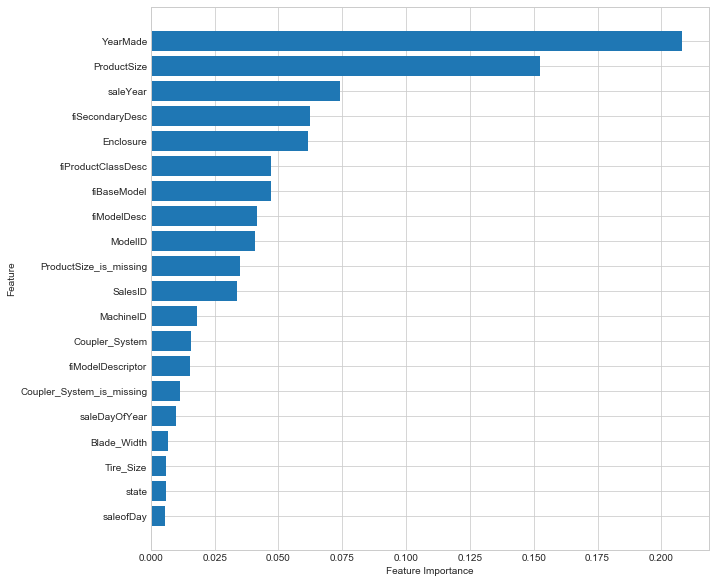

In [75]:
Plot_Features(X_Train.columns, Ideal_Model.feature_importances_ )

**Features are Arranged in Descending Order (Most Important Feature for Predicton is at the Top)**